# Tâche 8

In [54]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from tabulate import tabulate
import numpy as np
from matplotlib import pyplot as plt

In [55]:
with MPRester("yG2goZSVRMrBL7zx") as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-995181")

In [56]:
#initialisation des données et variables utiles par la suite
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
bandgap = bandstructure.get_band_gap()
en_fermi = data.get('zero_energy')
distances = data.get('distances')
energy = data.get('energy')

hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10)

## Détermination de la bande interdite

In [57]:
print('Energie de la bande interdite: ',bandgap['energy'],'[eV]')
if(bandgap['direct']==True):
    print('La bande interdite est directe.')
else:
    print('La bande interdite est indirecte.')
print('La transition se fait en: ',bandgap['transition'],'.')

Energie de la bande interdite:  0.20869999999999989 [eV]
La bande interdite est directe.
La transition se fait en:  K-K .


Comme la bande interdite est de faible énergie (<1eV), nous pouvons dire que notre cristal SnGe est un semi-conducteur.

## Dernière bande de valence 

In [58]:
valence_band = bandstructure.get_vbm()
print("Maximum de la dernière bande de valence : ")
print(tabulate([["Bande(s) contenant le maximum : ",str(valence_band['band_index'])],
	            ["Énergie du maximum : ",str(valence_band['energy'])+" [eV]"],
	            ["Sur le graphe Materials Project (E-E_fermi) : ",str(valence_band['energy']-en_fermi)+" [eV]"]],
	            headers=["",""]))



Maximum de la dernière bande de valence : 

---------------------------------------------  -------------------------------------------------
Bande(s) contenant le maximum :                defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})
Énergie du maximum :                           -1.8391 [eV]
Sur le graphe Materials Project (E-E_fermi) :  0.0 [eV]


(la dernière bande de valence est la 13ème bande)

## Première bande de conduction

In [59]:
conduction_band = bandstructure.get_cbm()
print("Minimum de la première bande de conduction : ")
print(tabulate([["Bande(s) contenant le minimum : ",str(conduction_band['band_index'])],
	            ["Énergie du minimum : ",str(conduction_band['energy'])+" [eV]"],
	            ["Sur le graphe Materials Project (E-E_fermi) : ",str(conduction_band['energy']-en_fermi)+" [eV]"]],
	            headers=["",""]))

Minimum de la première bande de conduction : 

---------------------------------------------  -------------------------------------------------
Bande(s) contenant le minimum :                defaultdict(<class 'list'>, {<Spin.up: 1>: [14]})
Énergie du minimum :                           -1.6304 [eV]
Sur le graphe Materials Project (E-E_fermi) :  0.20869999999999989 [eV]


(la première bande de conduction est la 14ème bande)

## Affichage de la structure des bandes électroniques

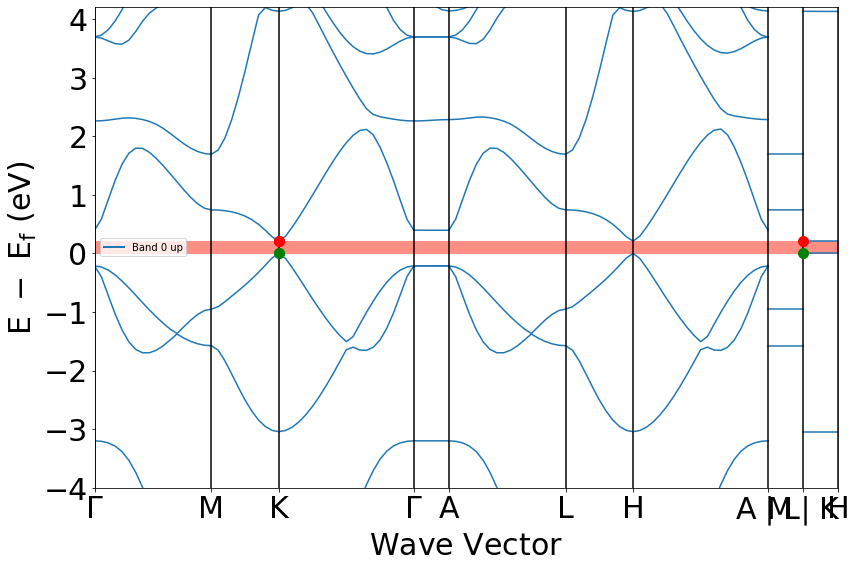

In [60]:
plot.get_plot()

#remplissage de la zone interdite
plt.fill_between(np.linspace(distances[0][0],distances[-1][-1],500),0,bandgap['energy'],color="#FF8E85")

#marqueur point sur le maximum de la bande de valence et le minimum de la bande de conduction
cbms = data.get('cbm')
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)
vbms = data.get('vbm')
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)

## Dispersion dans la dernière bande de valence 

In [61]:
diffmax=0
diffmin=10
for i in range(len(distances)):
    diff = abs(energy["1"][i][13][0]-energy["1"][i][13][-1])
    if diffmax<diff:
        diffmax=diff
        imax=i
    if diffmin>diff:
        diffmin=diff
        imin=i
print("Chemin avec la plus grande dispersion : ",imax+1)
print("La différence d'énergie est de : ",diffmax,"[eV]")
print("Chemin avec la plus petite dispersion : ",imin+1)
print("La différence d'énergie est de : ",diffmin,"[eV]")

Chemin avec la plus grande dispersion :  2
La différence d'énergie est de :  0.9511999999999998 [eV]
Chemin avec la plus petite dispersion :  4
La différence d'énergie est de :  0.0 [eV]


La plus grande dispersion (en rouge sur le schéma ci-dessous) se situe sur le chemin M - K et la plus petite (en vert sur le schéma ci-dessous) sur le chemin Γ - A.

## Dispersion dans la première bande de conduction 

In [62]:
diffmax=0
diffmin=10
for i in range(len(distances)):
    diff = abs(energy["1"][i][14][0]-energy["1"][i][14][-1])
    if diffmax<diff:
        diffmax=diff
        imax=i
    if diffmin>diff:
        diffmin=diff
        imin=i
print("Chemin avec la plus grande dispersion : ",imax+1)
print("La différence d'énergie est de : ",diffmax,"[eV]")
print("Chemin avec la plus petite dispersion : ",imin+1)
print("La différence d'énergie est de : ",diffmin,"[eV]")

Chemin avec la plus grande dispersion :  2
La différence d'énergie est de :  0.5343 [eV]
Chemin avec la plus petite dispersion :  9
La différence d'énergie est de :  0.0 [eV]


La plus grande dispersion (en rouge sur le schéma ci-dessous) se situe sur le chemin M - K et la plus petite (en vert sur le schéma ci-dessous) sur le chemin M|K - H (tout dernier chemin sur la figure).

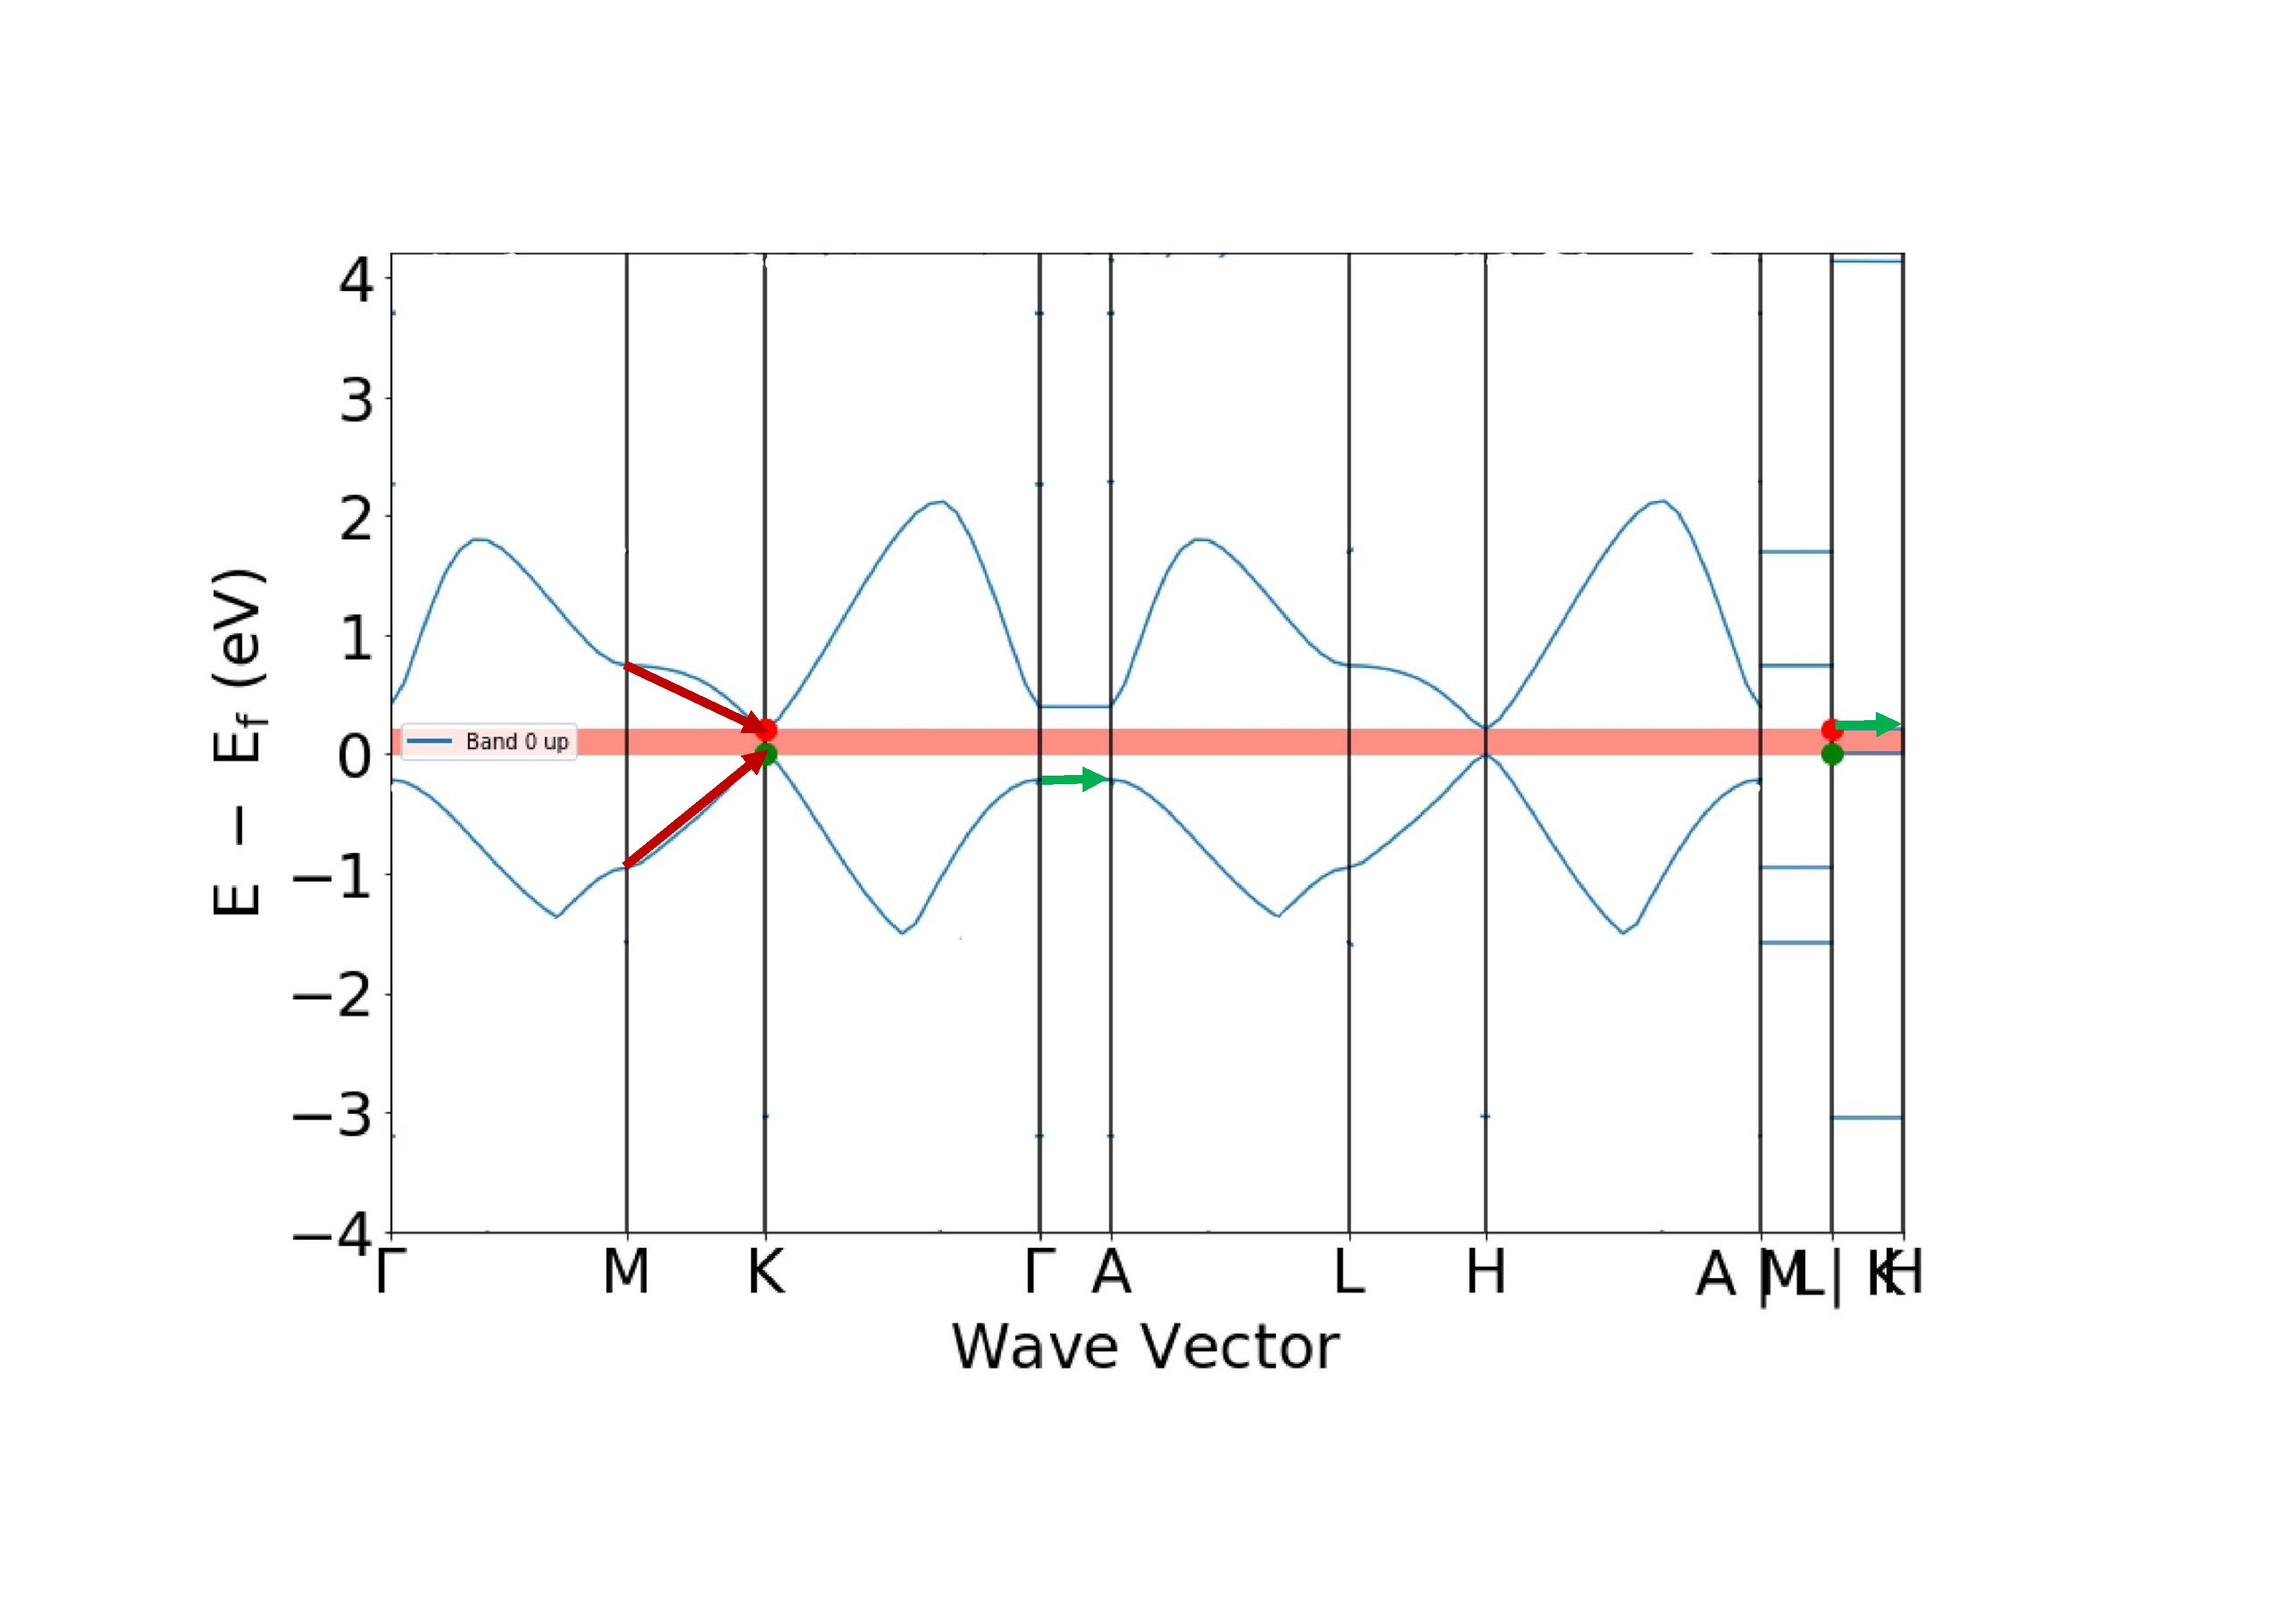

## Masse effective au sommet de la dernière bande de valence

# $m^* = \frac{\overline{h}^2}{\frac{d^2\epsilon}{d^2k}}$

In [63]:
#calcul de la parabole d'approximation aux alentours du VBM avec 3 points: le maximum, un point juste à gauche et un point juste à droite
k = np.zeros(3)
eps = np.zeros(3)
(k[1],eps[1]) = vbms[1]
(k[0],eps[0]) = (distances[1][-2],energy["1"][1][13][-2])
(k[2],eps[2]) = (distances[2][1],energy["1"][1][13][1])
a = np.polyfit(k,eps,2)

#affichage des résultats
print("Parabole d'approximation : ","𝜖(k) = "+str(a[0])+" k\u00b2 + "+str(a[1])+" k "+str(a[2]))
print("Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" [kg]")

Parabole d'approximation :  𝜖(k) = -214.54756076567386 k² + 553.99370676478 k -357.53580932258495
Masse effective :  -1.6176640608596391e-32 [kg]


## Masse effective à la base de la première bande de conduction

In [64]:
#calcul de la parabole d'approximation aux alentours du CBM avec 3 points: le minimum, un point juste à gauche et un point juste à droite
k = np.zeros(3)
eps = np.zeros(3)
(k[1],eps[1]) = vbms[1]
(k[0],eps[0]) = (distances[1][-2],energy["1"][1][14][-2])
(k[2],eps[2]) = (distances[2][1],energy["1"][1][14][1])
a = np.polyfit(k,eps,2)

#affichage des résultats
print("Parabole d'approximation : ","𝜖(k) = "+str(a[0])+" k\u00b2 + "+str(a[1])+" k +"+str(a[2]))
print("Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" [kg]")

Parabole d'approximation :  𝜖(k) = 222.05725677990486 k² + -577.6117469564152 k +375.59314627911397
Masse effective :  1.5629567050795794e-32 [kg]
